# Practical Applications

We have learned just enough linear algebra to be dangerous and get comfortable with using machine learning and data science libraries. However, we are going to go a step further and use linear algebra to solve a couple of problems "from scratch" using only NumPy. By solving these problems, you will see how linear algebra is used in practice and get a little further insight in how libraries and techniques work. 

Let's start with solving a system of equations. 

## Systems of Equations 

Let's put inverse matrices to some use. Let's say you are provided a system of linear equations as shown below and you need to solve for $ x $, $ y $, and $ z $. 

$
2x + 9y - 3z = 12 \\
x + 2y + 7z = 5 \\
x + 2y + 3z = 6
$

You could try to solve this algebraically, but you can actually approach this with a linear algebra approach. First, let's extract the coefficients mutliplied on each variable. Note that if there is no coefficient, the coefficient is effectively a $ 1 $ as multiplying by $ 1 $ has no impact. Also, a subtraction instead of an addition of an element will treat the coefficient as negative. 


$
A = \begin{bmatrix} 
2 & 9 & -3 \\
1 & 2 & 7 \\
1 & 2 & 3 
\end{bmatrix}
$

Before we go any further, let's make sure the determinant of this matrix is not zero. If it is, that means our system of equations will be unsolvable. 

In [7]:
import numpy as np
from numpy.linalg import det

A = np.array([
    [2, 9, -3],
    [1, 2, 7],
    [1, 2, 3]
])

det(A)

20.000000000000007

Alright, the determinant is approximately 20 so we are clear to move forward. 

Next, let's grab the terms on the right side of the equals sign  $ = $ and make that vector $ B $. 

$
B = \begin{bmatrix} 12 \\ 5 \\ 6 \end{bmatrix}
$

Now let's consider a vector $ X $ which contains all three unsolved variables $ x $, $ y $, and $ z $. 

$ 
X = \begin{bmatrix} x \\ y \\ z \end{bmatrix}
$

If we perform matrix vector multiplication between $ A $ and $ X $, that will result in vector $ B $. 

$
AX = B
$

$
\begin{bmatrix} 
2 & 9 & -3 \\
1 & 2 & 7 \\
1 & 2 & 3 
\end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 12 \\ 5 \\ 6 \end{bmatrix}
$

$
\begin{bmatrix} 
2x + 9y -3z \\
x + 2y + 7z \\
x + 2y + 3z 
\end{bmatrix} = \begin{bmatrix} 12 \\ 5 \\ 6 \end{bmatrix}
$

Let's go back to this expression:

$
AX = B
$

If we "multiply" each side by the inverse of matrix $ A $, which we will denote as $ A^{-1} $, we can effectively isolate the $ X $. 

$ 
A^{-1}AX= A^{-1}B
$

$ 
X = A^{-1}B
$

The reason $ A^{-1}A $ cancels out is its matrix multiplication results in an identity matrix, effectively isolating $ x $, $ y $, and $ z $. Mutiplying by an identity matrix is the linear algebra equivalent of multiplying by $ 1 $. It has no effect.

$
A^{-1}A = \begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix} 
$

$
A^{-1}AX = \begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}
$



I can prove this using NumPy. Let's calculate the inverse of $ A $. 

In [11]:
from numpy import array
from numpy.linalg import inv

A = array([
    [2, 9, -3],
    [1, 2, 7],
    [1, 2, 3]
])

A_inv = inv(A)

A_inv

array([[-0.4 , -1.65,  3.45],
       [ 0.2 ,  0.45, -0.85],
       [-0.  ,  0.25, -0.25]])

And let's apply the inverse $ A^{-1} $ to $ A $. 

In [13]:
A_inv @ A 

array([[ 1.0000000e+00,  0.0000000e+00, -8.8817842e-16],
       [ 0.0000000e+00,  1.0000000e+00, -4.4408921e-16],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

However, because NumPy has some floating point mess as shown above, I prefer to use SymPy as it will give me a much cleaner answer with only 1's and 0's. That's because it does symbolic math rather than floating point arithmetic.

In [15]:
from sympy import Matrix

A = Matrix([
    [2, 9, -3],
    [1, 2, 7],
    [1, 2, 3]
])

A_inv = A.inv()
A_inv @ A 

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Because of this reasoning, we can calculate the $ X $ vector containing $ x $, $ y $, and $ z $ using the inverse of matrix $ A $ multiplied with vector $ B $.

$ 
X = A^{-1}B
$

Let's use NumPy to now solve this system of equations using that simple expression that solves $ X $. 

In [17]:
from numpy import array
from numpy.linalg import inv

# 2x + 9y - 3z = 12
# 1x + 2y + 7z = 5
# 1x + 2y + 3z = 6

A = array([
    [2, 9, -3],
    [1, 2, 7],
    [1, 2, 3]
])

B = array([
    12,
    5,
    6
])

X = inv(A) @ B 

X

array([ 7.65, -0.45, -0.25])

Therefore, we find that $ X = \begin{bmatrix} 7.65 \\ -0.45 \\ -0.25 \end{bmatrix} $. This means $ x = 7.65 $, $ y = -0.45 $, and $ z = -0.25 $. 

Solving a system of equations like this extends to many problems like linear programming and many areas of scientific research.

Here is a visualization of this system of equations being solved. Notice how the yellow vector $ B $ shifts after the basis vectors reflecting matrix $ A $ are moved to their identity positions. This results in vector $ B $ becoming vector $ X $, effectively solving for the variables. 
<br><br>

<video src="https://github.com/thomasnield/anaconda_linear_algebra/raw/main/media/01_SystemOfEquationsScene.mp4" controls="controls" style="max-width: 730px;">
</video>


## Eigendecomposition

Matrix decomposition is breaking up a matrix into components, much like factoring numbers (e.g., 6 can be factored to 2 × 3). We use matrix decomposition for several tasks like fitting a linear regression (which we will do after this section) and calculating inverse matrices. For this example, we will talk about a common type of matrix decomposition called eigendecomposition, which is used often in machine learning and principal component analysis. At this level we do not have the bandwidth to dive into each of these applications but we will at least learn the process to get familiar with decomposition. 

The formula for eigendecomposition is as follows, where $ v $ is the eigenvalues and $ \lambda $ is the eigenvectors. $ A $ is the original matrix. 

$ 
Av = \lambda v
$ 

There is one eigenvector and eigenvalue for each dimension of the matrix $ A $, and not every matrix can be decomposed with eigendecomposition.

Let's perform eigendecomposition on matrix $ A $ below by using the `eig()` function in NumPy's `linalg` package. This is going to result in those two components: eigenvectors and eigenvalues. 


In [21]:
from numpy import array, diag
from numpy.linalg import eig, inv 


A = array([
    [2, 9,],
    [1, 2,]
])


eigenvals, eigenvecs = eig(A)

print("EIGENVALUES")
print(eigenvals)
print("\nEIGENVECTORS")
print(eigenvecs)

EIGENVALUES
[ 5. -1.]

EIGENVECTORS
[[ 0.9486833  -0.9486833 ]
 [ 0.31622777  0.31622777]]


Now how do we recompose matrix $ A $ from the eigenvectors and eigenvalues? To reconstruct, we need this formula: 

$
A = Q \Lambda Q^{-1}
$

$ Q $ is the eigenvectors, $ \Lambda $ is the eigenvalues in diagonal form, and $ Q^{-1} $ is the inverse matrix of $ Q $.  

Let's reconstruct this with NumPy, and sure enough you will see the original matrix $ A $ put back together. 

In [23]:
Q = eigenvecs
Q_inv = inv(Q)

L = diag(eigenvals)
A = Q @ L @ Q_inv

print(A)

[[2. 9.]
 [1. 2.]]


## Linear Regression 

Here is another place we can use linear algebra for a highly useful problem. A **linear regression** fits a straight line to observed data, attempting to demonstrate a linear relationship between variables and make predictions on new data yet to be observed. While there are many ways to fit a linear regression, including gradient descent, we can use inverse matrices as well as matrix decomposition techniques. Let's start with an inverse matrix technique. 

Let's first bring in a dataset containing two columns $ x $ and $ y $ from Github, and save it to a Pandas DataFrame. 

In [25]:
import pandas as pd 
import numpy as np 

url = r"https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv"

df = pd.read_csv(url, delimiter=",")
df

,x,y
0,1,-13.115843
1,2,25.806547
2,3,-5.017285
3,4,20.256415
4,5,4.075003
...,...,...
94,95,188.345749
95,96,175.222504
96,97,163.225774
97,98,150.894306


Next let's visualize this data using matplotlib. 

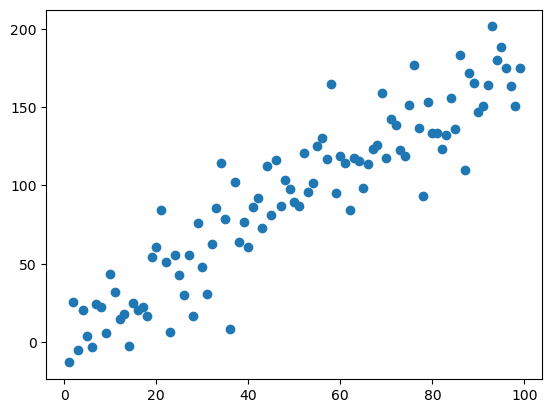

In [27]:
import matplotlib.pyplot as plt

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]
plt.plot(X, Y, 'o') # scatterplot
plt.show()

Looking ath this data there definitely seems to be a linear relationship here, as when $ x $ proportionally increases/decreases then $ y $ proportionally increases/decreases as well. Let's learn how to fit a line using some linear algebra techniques. 

First, let's observe the following formula to get a vector of coefficients $ b $ for a linear function. 

$
\Large b = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$

$ X $ is a matrix of the input variable values, which in this case only has one column. However, we are going to pad some 1's as an extra column so that will generate an intercept coefficient and not just a slope. $ y $ is the vector of the output variable. $ X^T $ is the transposed matrix of $ X $. 

Let's first pad $ X $ with an extra column of 1's, and call it `X_1`. We will use this in place of $ X $ in our formula above. 

In [30]:
# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X.flatten(), np.ones(len(X))]).transpose()

X_1

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.],
       [25.,  1.],
       [26.,  1.],
       [27.,  1.],
       [28.,  1.],
       [29.,  1.],
       [30.,  1.],
       [31.,  1.],
       [32.,  1.],
       [33.,  1.],
       [34.,  1.],
       [35.,  1.],
       [36.,  1.],
       [37.,  1.],
       [38.,  1.],
       [39.,  1.],
       [40.,  1.],
       [41.,  1.],
       [42.,  1.],
       [43.,  1.],
       [44.,  1.],
       [45.,  1.],
       [46.,  1.],
       [47.,  1.],
       [48.,  1.],
       [49.,  1.],
       [50.,  1.],
       [51.,  1.],
       [52.,  1.],
       [53.,

Now let's apply this formula and execute it using NumPy. We will now get the coefficients in vector $ b $. 

$
\Large b = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$

In [32]:
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
b

array([1.75919315, 4.69359655])

$ 1.75919315 $ is the value for the slope, and $ 4.69359655 $ is the value for the intercept. Let's plot the line through the points. 

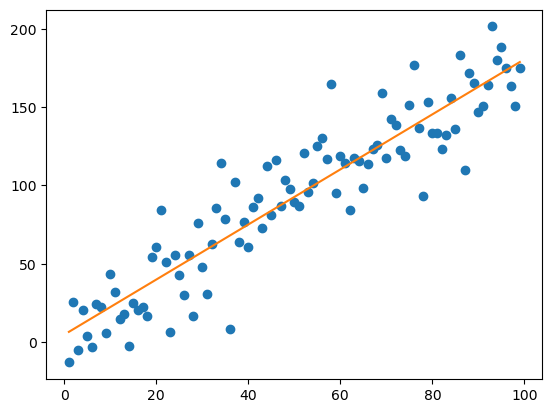

In [34]:
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, X_1 @ b) # line
plt.show()

That looks correct, and for this particular problem this is fine. However, when you have a lot of data with many columns, computers can start to produce unstable results due to floating point precision issues. This is a use case for matrix decomposition, which in this case we can use QR decomposition. By first decomposing $ X $ into the $ Q $ and $ R $ components (and by $ X $ I mean with the column of 1's), we can make this linear regression more numerically stable. 

We can first decompose $ X $ into components $ Q $ and $ R $. 

In [36]:
from numpy.linalg import qr

Q,R = qr(X_1)
print("Q:")
print(Q)

print("R:")
print(R)

Q:
[[-0.00174514 -0.19948668]
 [-0.00349029 -0.19643331]
 [-0.00523543 -0.19337994]
 [-0.00698058 -0.19032657]
 [-0.00872572 -0.18727321]
 [-0.01047087 -0.18421984]
 [-0.01221601 -0.18116647]
 [-0.01396116 -0.1781131 ]
 [-0.0157063  -0.17505974]
 [-0.01745145 -0.17200637]
 [-0.01919659 -0.168953  ]
 [-0.02094174 -0.16589963]
 [-0.02268688 -0.16284627]
 [-0.02443203 -0.1597929 ]
 [-0.02617717 -0.15673953]
 [-0.02792232 -0.15368616]
 [-0.02966746 -0.1506328 ]
 [-0.03141261 -0.14757943]
 [-0.03315775 -0.14452606]
 [-0.0349029  -0.14147269]
 [-0.03664804 -0.13841933]
 [-0.03839319 -0.13536596]
 [-0.04013833 -0.13231259]
 [-0.04188348 -0.12925922]
 [-0.04362862 -0.12620586]
 [-0.04537377 -0.12315249]
 [-0.04711891 -0.12009912]
 [-0.04886406 -0.11704575]
 [-0.0506092  -0.11399239]
 [-0.05235435 -0.11093902]
 [-0.05409949 -0.10788565]
 [-0.05584464 -0.10483228]
 [-0.05758978 -0.10177892]
 [-0.05933493 -0.09872555]
 [-0.06108007 -0.09567218]
 [-0.06282522 -0.09261881]
 [-0.06457036 -0.08956545

Then we can use this formula to calculate the coefficients in vector $ b $. 

$
\Large b = R^{-1} \cdot Q^T \cdot y 
$

All we need from NumPy is some inverse matrix and transposition work, and then some matrix multiplication. 

In [39]:
b = inv(R) @ Q.transpose() @ Y 
b

array([1.75919315, 4.69359655])

Again, 1.75919315  is the value for the slope, and  4.69359655  is the value for the intercept. This gives us the exact same answer as the plain inverse technique, but for larger and more complex datasets this QR decomposition approach will be more numerically stable. 

## Neural Networks 

A heavy-duty use case for linear algebra has become neural networks and deep learning. Let's see what this looks like to implement a simple forward propagation neural network completely from scratch using just NumPy. We are not going to learn about backpropagation and gradient descent here, which I [cover in my book _Essential Math for Data Science_](https://learning.oreilly.com/library/view/essential-math-for/9781098102920/). 

Let's say we have some data representing different background colors (with input variables `RED`, `GREEN`, and `BLUE`). We also have a `LIGHT_OR_DARK_FONT_IND` indicating whether a light (0) or dark (1) font will work best with that background. 

In [43]:
import pandas as pd

df = pd.read_csv("https://tinyurl.com/y2qmhfsr")
df.sample(10, random_state=7)

,RED,GREEN,BLUE,LIGHT_OR_DARK_FONT_IND
568,179,204,255,1
564,179,179,179,1
313,205,102,29,0
548,173,216,230,1
396,122,197,205,1
17,0,197,205,1
603,197,193,170,1
1301,70,130,180,0
658,205,200,177,1
13,0,139,69,0


Let's capture the three input columns as matrix $ X $ and the output column as vector $ Y $. 

$
X = \begin{bmatrix}179 & 204 & 255\\179 & 179 & 179\\205 & 102 & 29\\173 & 216 & 230\\122 & 197 & 205\\ & ... & \\ 0 & 197 & 205\\197 & 193 & 170\\70 & 130 & 180\\205 & 200 & 177\\0 & 139 & 69\end{bmatrix}
$

$
Y = \begin{bmatrix}1\\1\\0\\1\\1\\...\\1\\1\\0\\1\\0\end{bmatrix}
$

We can extract the $ X $ and $ Y $ as NumPy arrays from the `DataFrame`. We will also scale $ X $ down by 255 so the input values are between 0 and 1. This will reduce the number space into a smaller, more mathematically convenient range than the full 0-255. 

In [46]:
X = df.values[:,:3] / 255 
Y = df.values[:,-1]

Normally, we would use this data to train a neural network to predict a light or dark font for a given background color. However, the neural network we are about to build is already "trained" for the sake of scope in this class. 

We could use simpler models like logistic regression for this problem, but this is a great toy problem to understand neural networks. It is also a microcosm of computer vision, as the three input variables `RED`, `GREEN`, and `BLUE` could represent a single pixel in an image. 

Let's do a quick crash course on neural networks with the aid of some animation. A neural network is a multi-layered series of multiplication and addition operations (thus, matrix multiplication) with some nonlinear functions in the mix. The output is a value between 0 and 1, suggesting the "probability" of a dark font. 


<video src="https://github.com/thomasnield/anaconda_linear_algebra/raw/main/media/02_NeuralNetworkScene.mp4" controls="controls" style="max-width: 730px;">
</video>

Above, we represent the `RED`, `GREEN`, and `BLUE` inputs as $x_1$, $x_2$, and $x_3$. This would represent one row of matrix $ X $. We have three nodes in the *hidden layer* and associate weights $w_1$ through $w_9$ for each pair of input node to hidden node. We also add a bias value to each node. The resulting value is passed to a nonlinear function called ReLU which simply turns negative values to 0. We repeat this process again between the hidden nodes and the output node, which involves another three weights $w_{10}$ through $w_{12}$ and another bias value $ b_4$. That is passed through a sigmoid function. If that output value is less than $0.5$, we categorize it as `LIGHT`. Otherwise, we categorize it as `DARK`. 

Note how each layer of nodes can be represented purely by matrices of the weights and biases. Let's capture them below. 

<br><br>


$
W_{hidden} = \begin{bmatrix}
w_1 & w_2 & w_3 \\
w_4 & w_5 & w_6 \\
w_7 & w_8 & w_9
\end{bmatrix}
$

$
W_{output} = \begin{bmatrix}
w_{10} \\
w_{11} \\
w_{12} 
\end{bmatrix}
$


$
B_{hidden} = \begin{bmatrix}b_1\\b_2\\b_3 \end{bmatrix}
$

$
B_{output} = \begin{bmatrix}b_4\end{bmatrix}
$ 

<br><br>

Now, normally you would solve for these weight and bias values through a complicated procedure called backpropagation with stochastic gradient descent. For this example, however, I have already solved for these weight and bias values as shown below. 

<br><br>

$
W_{hidden} = \begin{bmatrix}3.5574801792467 & 8.48639024065542 & 1.59453643090894\\4.28982009818168 & 8.35518250953765 & 1.36713925567114\\3.7207429234428 & 8.13223257221876 & 1.48165938844881\end{bmatrix}
$

$
W_{output} = \begin{bmatrix}4.27394193741564 & 3.656340721696 & 2.63047525734278\end{bmatrix}
$

$
B_{hidden} = \begin{bmatrix}-6.67311750917892\\-6.34084123159501\\-6.10933576744567\end{bmatrix}
$

$
B_{output} = \begin{bmatrix}-5.46880991264584\end{bmatrix}
$ 
<br><br>

I have declared them in NumPy below. 

In [49]:
import numpy as np 

w_hidden = np.array([
    [3.55748018, 8.48639024, 1.59453643],
    [4.2898201,  8.35518251, 1.36713926],
    [3.72074292, 8.13223257, 1.48165939]
])

w_output = np.array([
    [4.27394194, 3.65634072, 2.63047526]
])

b_hidden = np.array([
    [-6.67311751],
    [-6.34084123],
    [-6.10933577]
])

b_output = np.array([
    [-5.46880991]
])

Now here is a matrix multiplication and addition operation, with the nonlinear functions `sigmoid` and `relu`, that will take a given input of one or more background colors $ X $ 

$ 
Y_{pred} = \text{Sigmoid}(W_{output} \cdot \text{ReLU}(W_{hidden} \cdot X + B_{hidden}) + B_{output})
$

Let's implement that whole line in NumPy using a `forward_prop()` function. These will output the suggested probabilities of beig a `DARK` font. 

In [53]:
# Activation functions
relu = lambda x: np.maximum(x, 0)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    hidden = relu(w_hidden @ X + b_hidden)
    output = sigmoid(w_output @ hidden + b_output)
    return output

# Calculate predictions for all background colors 
predictions = forward_prop(X.transpose())
predictions

array([[0.00419854, 0.00419854, 0.00419854, ..., 0.00419854, 1.        ,
        0.00419854]])

To better summarize this performance (we will not do best practices like train/test splits or confusion matrices here), we can set all values that are at least $ 0.5 $ to $ 1 $ and anything less to $ 0 $. Then we can compare to the actual $ Y $ values to these new predicted $ Y{pred} $ values. This gives us the means to calculate the total percentage of accurate predictions. 

In [55]:
comparisons = np.equal((predictions >= .5).flatten().astype(int), Y)
accuracy = sum(comparisons.astype(int) / Y.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.9866171003717706


## Exercise 

Solve the system of equations below using NumPy. 

$
4x + 1y - 1z = 1 \\
1x + 0.5y + 2z = 3 \\
2x + 1y + 2z = -2
$

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

The values for $ x $, $y$, and $z$ can be calculated by finding the inverse of the coefficient matrix and multiplying it against the right-hand vector as shown below. 

The vector $\begin{bmatrix}7.5 & -25.0 & 4.0\end{bmatrix} $ contains the three values respectively. 

In [58]:
from numpy import array
from numpy.linalg import inv

import sympy as sp 

# 4x + 1y - z = 1
# 1x + 0.5y + 2z = 3
# 2x + 1y + 2z = -2

A = array([
    [4, 1, -1],
    [1, 0.5, 2],
    [2, 1, 2]
])

B = array([
    1,
    3,
    -2
])

X = inv(A) @ B 

X

array([  7.5, -25. ,   4. ])